<a href="https://colab.research.google.com/github/Joharliv/Blood-Sugar-Prediction-Data-Analysis/blob/main/Blood_Sugar_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Post‑Meal Blood Sugar Spike Using Linear Regression
### Mini‑Project | Data Analytics

In this project, we build a **Predictive Model for Blood Glucose Spike after meals** using:
- **NumPy**
- **Pandas**
- **Regex (for cleaning)**
- **Matplotlib**
- **EDA techniques**
- **Linear Regression**

This notebook follows the complete flow you studied in class:
**Dataset → Cleaning → EDA → Visualisation → Preprocessing → Model Building → Prediction**.

---
## 📘 Theory Section

### 🔹 1. What is Blood Sugar Spike?
After eating a meal, glucose levels naturally rise. The amount of spike depends on:
- Carbohydrates
- Meal Type
- Calorie Intake
- Time of Day

Predicting this spike helps for **health monitoring and diabetes management**.


## 1. Import Libraries

In [18]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## 2. Load Dataset
Replace this dummy dataset with your Kaggle dataset.

In [19]:

np.random.seed(42)

data = pd.DataFrame({
    'meal_type': np.random.choice(['breakfast','lunch','dinner','snack'], 200),
    'carbs': np.random.randint(10,150,200),
    'calories': np.random.randint(150,1000,200),
    'time_of_day': np.random.choice(['morning','afternoon','evening','night'], 200),
    'glucose_post_meal': np.random.randint(90,250,200)
})

data.head()


,meal_type,carbs,calories,time_of_day,glucose_post_meal
0,dinner,72,769,morning,175
1,snack,105,154,morning,148
2,breakfast,61,252,afternoon,116
3,dinner,105,345,afternoon,187
4,dinner,141,923,evening,194


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['carbs'].plot(kind='hist', bins=20, title='carbs')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['calories'].plot(kind='hist', bins=20, title='calories')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['glucose_post_meal'].plot(kind='hist', bins=20, title='glucose_post_meal')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('meal_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('time_of_day').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='index', y='carbs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='carbs', y='calories', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='calories', y='glucose_post_meal', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['carbs']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('meal_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='meal_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('carbs')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['carbs']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('time_of_day')):
  _plot_series(series, series_name, i)
  fig.legend(title='time_of_day', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('carbs')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['calories']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('meal_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='meal_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('calories')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['calories']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('time_of_day')):
  _plot_series(series, series_name, i)
  fig.legend(title='time_of_day', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('calories')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['carbs'].plot(kind='line', figsize=(8, 4), title='carbs')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['calories'].plot(kind='line', figsize=(8, 4), title='calories')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['glucose_post_meal'].plot(kind='line', figsize=(8, 4), title='glucose_post_meal')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['time_of_day'].value_counts()
    for x_label, grp in _df_17.groupby('meal_type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('meal_type')
_ = plt.ylabel('time_of_day')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['meal_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='index', y='meal_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['time_of_day'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='index', y='time_of_day', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['meal_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='carbs', y='meal_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['time_of_day'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='carbs', y='time_of_day', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## 3. Data Cleaning (Using Regex)
Here we ensure column names follow proper patterns.

In [20]:

# Example regex cleanup
clean_cols = [re.sub(r'[^a-zA-Z0-9_]', '', col.lower()) for col in data.columns]
data.columns = clean_cols
data.head()


,meal_type,carbs,calories,time_of_day,glucose_post_meal
0,dinner,72,769,morning,175
1,snack,105,154,morning,148
2,breakfast,61,252,afternoon,116
3,dinner,105,345,afternoon,187
4,dinner,141,923,evening,194


## 4. Exploratory Data Analysis (EDA)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   meal_type          200 non-null    object
 1   carbs              200 non-null    int64 
 2   calories           200 non-null    int64 
 3   time_of_day        200 non-null    object
 4   glucose_post_meal  200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [22]:
data.describe()

,carbs,calories,glucose_post_meal
count,200.000000,200.000000,200.000000
mean,82.875000,590.430000,165.705000
std,40.207244,253.479852,45.415756
min,11.000000,154.000000,90.000000
25%,48.000000,366.750000,126.500000
50%,78.500000,603.000000,167.000000
75%,121.250000,812.250000,201.250000
max,149.000000,998.000000,249.000000


### Distribution of Glucose Levels

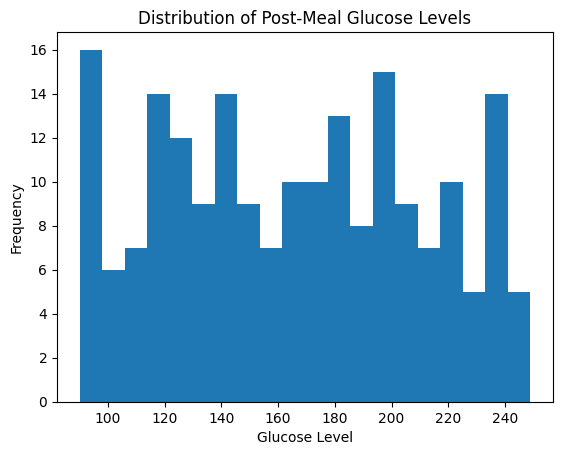

In [23]:

plt.hist(data['glucose_post_meal'], bins=20)
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.title('Distribution of Post-Meal Glucose Levels')
plt.show()


### Carbohydrates vs Glucose Scatter Plot

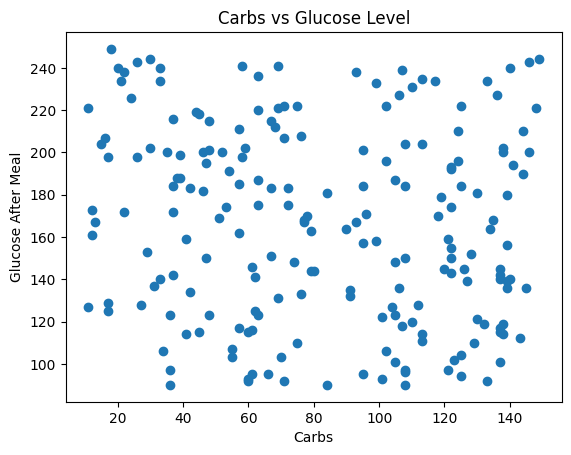

In [24]:

plt.scatter(data['carbs'], data['glucose_post_meal'])
plt.xlabel('Carbs')
plt.ylabel('Glucose After Meal')
plt.title('Carbs vs Glucose Level')
plt.show()


### Calories vs Glucose Scatter Plot

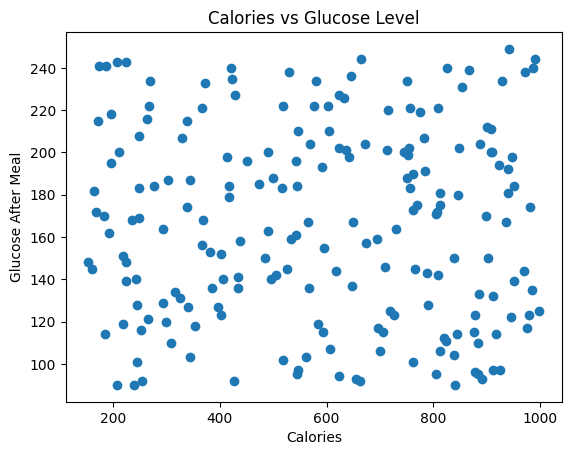

In [25]:

plt.scatter(data['calories'], data['glucose_post_meal'])
plt.xlabel('Calories')
plt.ylabel('Glucose After Meal')
plt.title('Calories vs Glucose Level')
plt.show()


### Meal Type Count

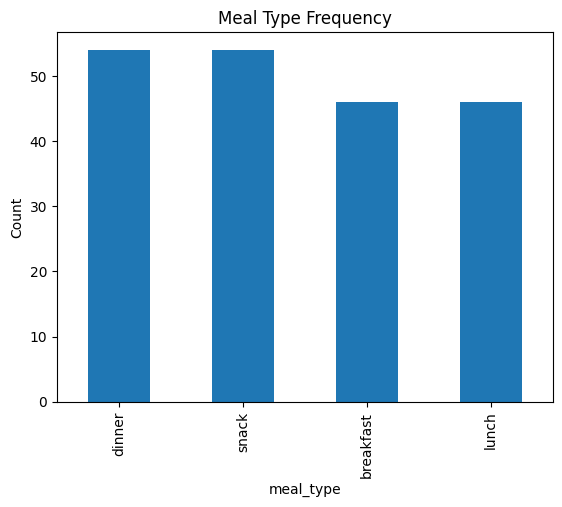

In [26]:

data['meal_type'].value_counts().plot(kind='bar')
plt.title('Meal Type Frequency')
plt.ylabel('Count')
plt.show()


### Average Glucose per Meal Type

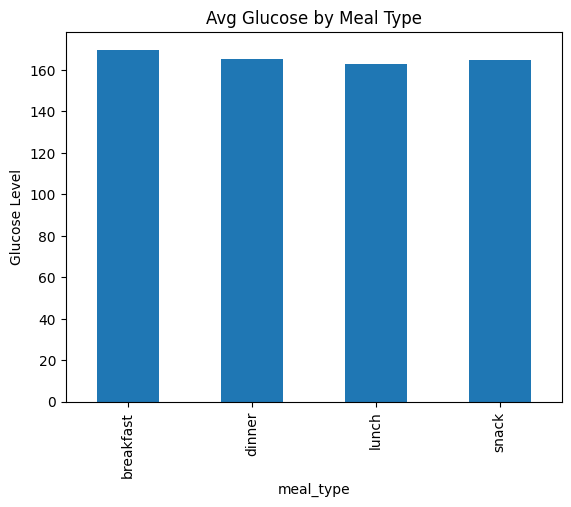

In [27]:

data.groupby('meal_type')['glucose_post_meal'].mean().plot(kind='bar')
plt.title('Avg Glucose by Meal Type')
plt.ylabel('Glucose Level')
plt.show()


### Time of Day vs Glucose (Boxplot)

<Figure size 600x400 with 0 Axes>

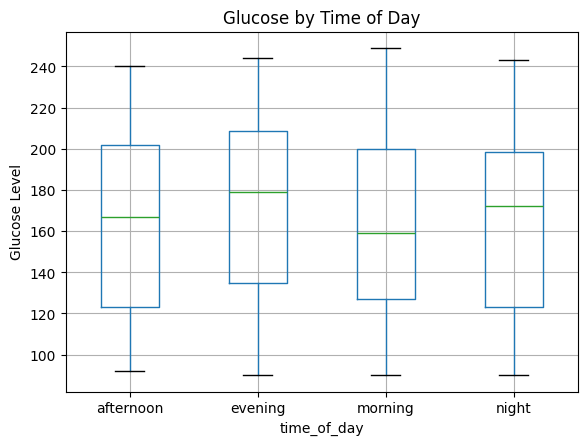

In [28]:

plt.figure(figsize=(6,4))
data.boxplot(column='glucose_post_meal', by='time_of_day')
plt.title('Glucose by Time of Day')
plt.suptitle('')
plt.ylabel('Glucose Level')
plt.show()


## 5. Data Preprocessing

In [29]:

X = data[['meal_type','carbs','calories','time_of_day']]
y = data['glucose_post_meal']

numeric = ['carbs','calories']
categorical = ['meal_type','time_of_day']

preprocess = ColumnTransformer([
    ('num', StandardScaler(), numeric),
    ('cat', OneHotEncoder(), categorical)
])


## 6. Train-Test Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Linear Regression Model

In [31]:

model = Pipeline([
    ('prep', preprocess),
    ('lr', LinearRegression())
])
model.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carbs', 'calories']),
                                                 ('cat', OneHotEncoder(),
                                                  ['meal_type',
                                                   'time_of_day'])])),
                ('lr', LinearRegression())])

## 8. Model Evaluation

In [32]:

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(3237.3688949788802, -0.32768971402922675)

### Actual vs Predicted Plot

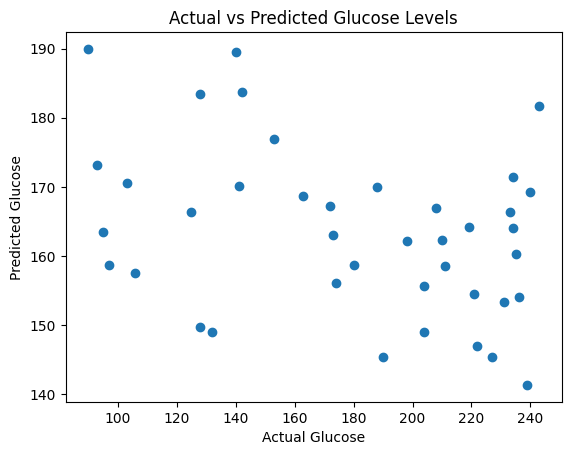

In [33]:

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Glucose')
plt.ylabel('Predicted Glucose')
plt.title('Actual vs Predicted Glucose Levels')
plt.show()


## 9. Prediction Example

In [34]:

sample = pd.DataFrame({
    'meal_type': ['lunch'],
    'carbs': [70],
    'calories': [600],
    'time_of_day': ['afternoon']
})
model.predict(sample)


array([153.33835629])